In [25]:
!pip install yfinance
!pip install tensorflow

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implementation

In [27]:
def fill_missing_values(dataset):
  resampled_dataset = dataset.ffill()
  resampled_dataset['Volume'] = dataset['Volume'].fillna(0)
  return resampled_dataset

In [28]:
gold_30m = yf.download("GC=F", period="60d", interval="30m")
gold_30m.columns = gold_30m.columns.droplevel(1)
# gold_30m = fill_missing_values(gold_30m)
gold_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/gold.csv', index=True)

silver_30m = yf.download("SI=F", period="60d", interval="30m")
silver_30m.columns = silver_30m.columns.droplevel(1)
# silver_30m = fill_missing_values(silver_30m)
silver_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/silver.csv', index=True)

cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
cad_30m.columns = cad_30m.columns.droplevel(1)
# cad_30m = fill_missing_values(cad_30m)
cad_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/cad.csv', index=True)


gold_1h = yf.download("GC=F", period='730d', interval="1h")
gold_1h.columns = gold_1h.columns.droplevel(1)
# gold_1h = fill_missing_values(gold_1h)
gold_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/gold.csv', index=True)

silver_1h = yf.download("SI=F", period="730d", interval="1h")
silver_1h.columns = silver_1h.columns.droplevel(1)
# silver_1h = fill_missing_values(silver_1h)
silver_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/silver.csv', index=True)

cad_1h = yf.download("CADUSD=X", period="730d", interval="1h")
cad_1h.columns = cad_1h.columns.droplevel(1)
# cad_1h = fill_missing_values(cad_1h)
cad_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/cad.csv', index=True)


gold_1d = yf.download("GC=F", start='2000-1-1', end='2025-12-1', interval="1d")
gold_1d.columns = gold_1d.columns.droplevel(1)
# gold_1d = fill_missing_values(gold_1d)
gold_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/gold.csv', index=True)

silver_1d = yf.download("SI=F", start='2000-1-1', end='2025-12-1', interval="1d")
silver_1d.columns = silver_1d.columns.droplevel(1)
# silver_1d = fill_missing_values(silver_1d)
silver_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/silver.csv', index=True)

cad_1d = yf.download("CADUSD=X", start='2000-1-1', end='2025-12-1', interval="1d")
cad_1d.columns = cad_1d.columns.droplevel(1)
# cad_1d = fill_missing_values(cad_1d)
cad_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/cad.csv', index=True)

/tmp/ipython-input-4241103084.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_30m = yf.download("GC=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_30m = yf.download("SI=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_1h = yf.download("GC=F", period='730d', interval="1h")
[*********************100%***********************]  1 of 1 completed
/tmp/ipyth

In [29]:
gold_30m = gold_30m[["Close"]].rename(columns={"Close": "Gold"})
silver_30m = silver_30m[["Close"]].rename(columns={"Close": "Silver"})
cad_30m = cad_30m[["Close"]].rename(columns={"Close": "CAD"})

prices_30m = gold_30m.join([silver_30m, cad_30m], how="outer")
prices_30m = prices_30m.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_30m.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_30m.csv")

In [30]:
gold_1h = gold_1h[["Close"]].rename(columns={"Close": "Gold"})
silver_1h = silver_1h[["Close"]].rename(columns={"Close": "Silver"})
cad_1h = cad_1h[["Close"]].rename(columns={"Close": "CAD"})

prices_1h = gold_1h.join([silver_1h, cad_1h], how="outer")
prices_1h = prices_1h.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1h.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1h.csv")

In [31]:
gold_1d = gold_1d[["Close"]].rename(columns={"Close": "Gold"})
silver_1d = silver_1d[["Close"]].rename(columns={"Close": "Silver"})
cad_1d = cad_1d[["Close"]].rename(columns={"Close": "CAD"})

prices_1d = gold_1d.join([silver_1d, cad_1d], how="outer")
prices_1d = prices_1d.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1d.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1d.csv")

In [32]:
prices_30m.head()

Price,Gold,Silver,CAD
Datetime,,,
2025-09-09 23:00:00+00:00,3780.300049,44.195,0.722157
2025-09-09 23:30:00+00:00,3780.300049,44.195,0.722235
2025-09-10 00:00:00+00:00,3780.300049,44.195,0.721704
2025-09-10 00:30:00+00:00,3780.300049,44.195,0.721730
2025-09-10 01:00:00+00:00,3780.300049,44.195,0.721459


In [33]:
prices_30m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2863 entries, 2025-09-09 23:00:00+00:00 to 2025-12-02 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    2863 non-null   float64
 1   Silver  2863 non-null   float64
 2   CAD     2863 non-null   float64
dtypes: float64(3)
memory usage: 89.5 KB


In [34]:
prices_30m.describe()

Price,Gold,Silver,CAD
count,2863.000000,2863.000000,2863.000000
mean,4016.334102,48.692599,0.715595
std,162.623904,3.306378,0.004738
min,3750.899902,43.919998,0.707269
25%,3880.400024,46.840000,0.712454
50%,4026.600098,48.290001,0.714454
75%,4136.150146,50.744999,0.717615
max,4394.299805,59.230000,0.728014


## Plots

These plots are to analyse if there is any initial noise in the data to remove it

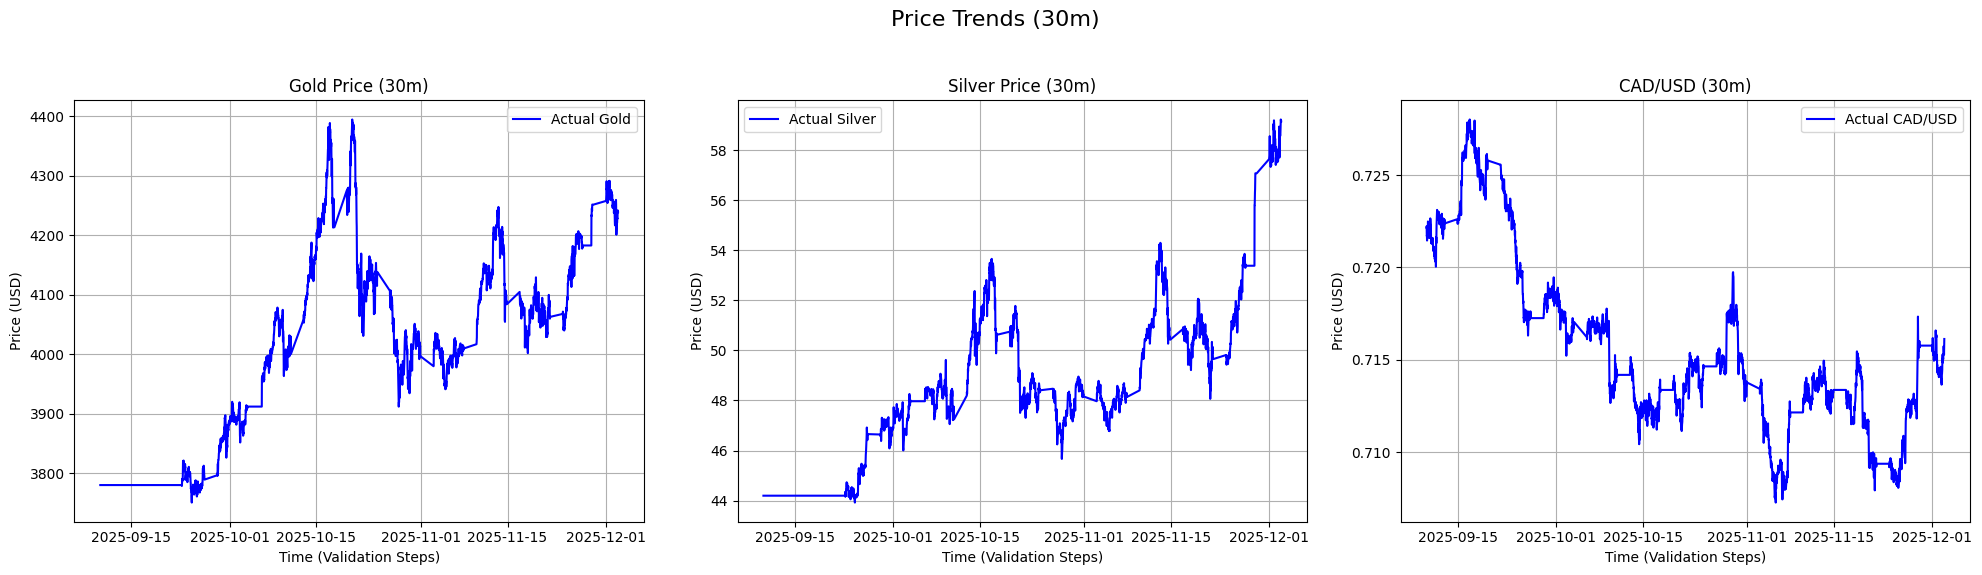

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (30m)', fontsize=16)

# gold
axes[0].plot(prices_30m['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (30m)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_30m['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (30m)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_30m['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (30m)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

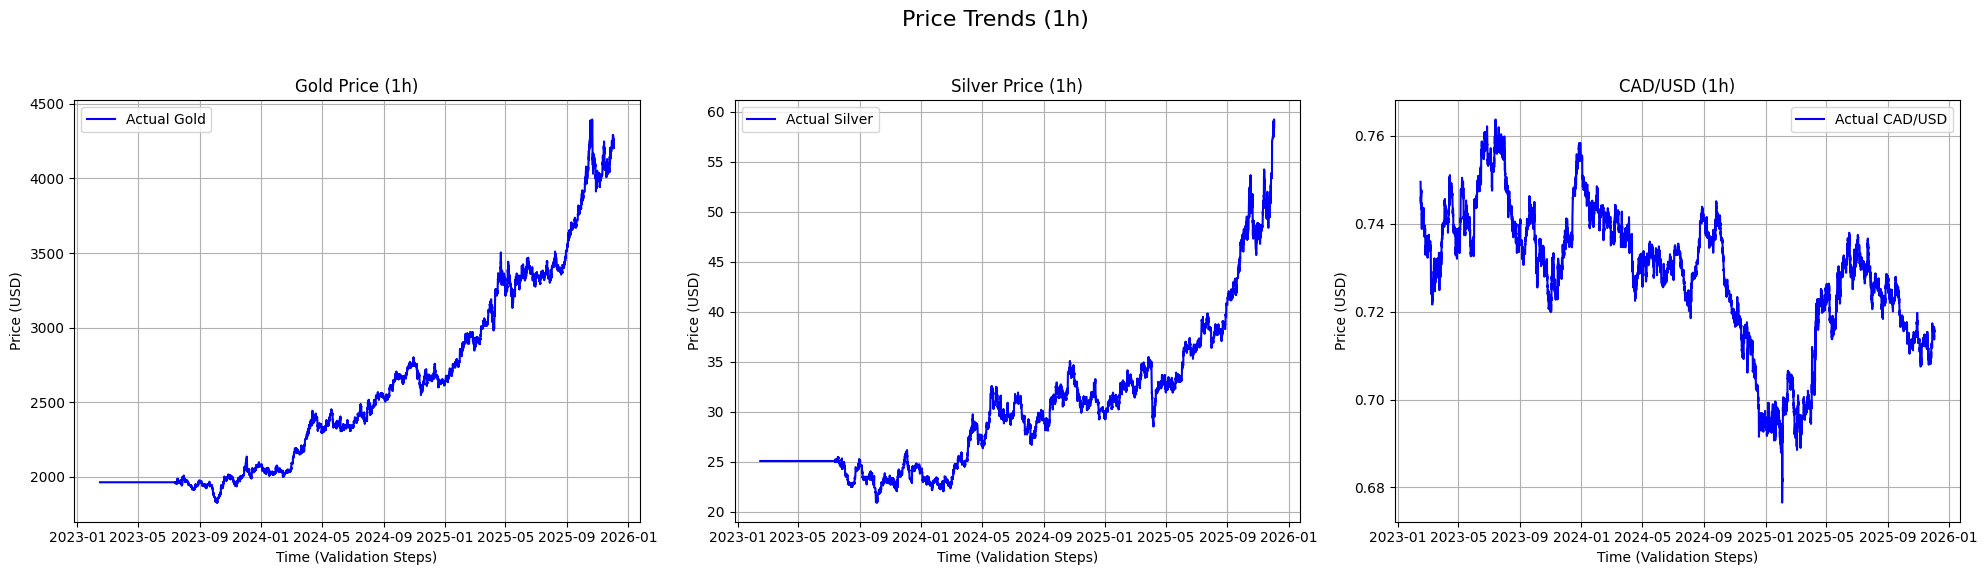

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1h)', fontsize=16)

# gold
axes[0].plot(prices_1h['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1h)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1h['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1h)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1h['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1h)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

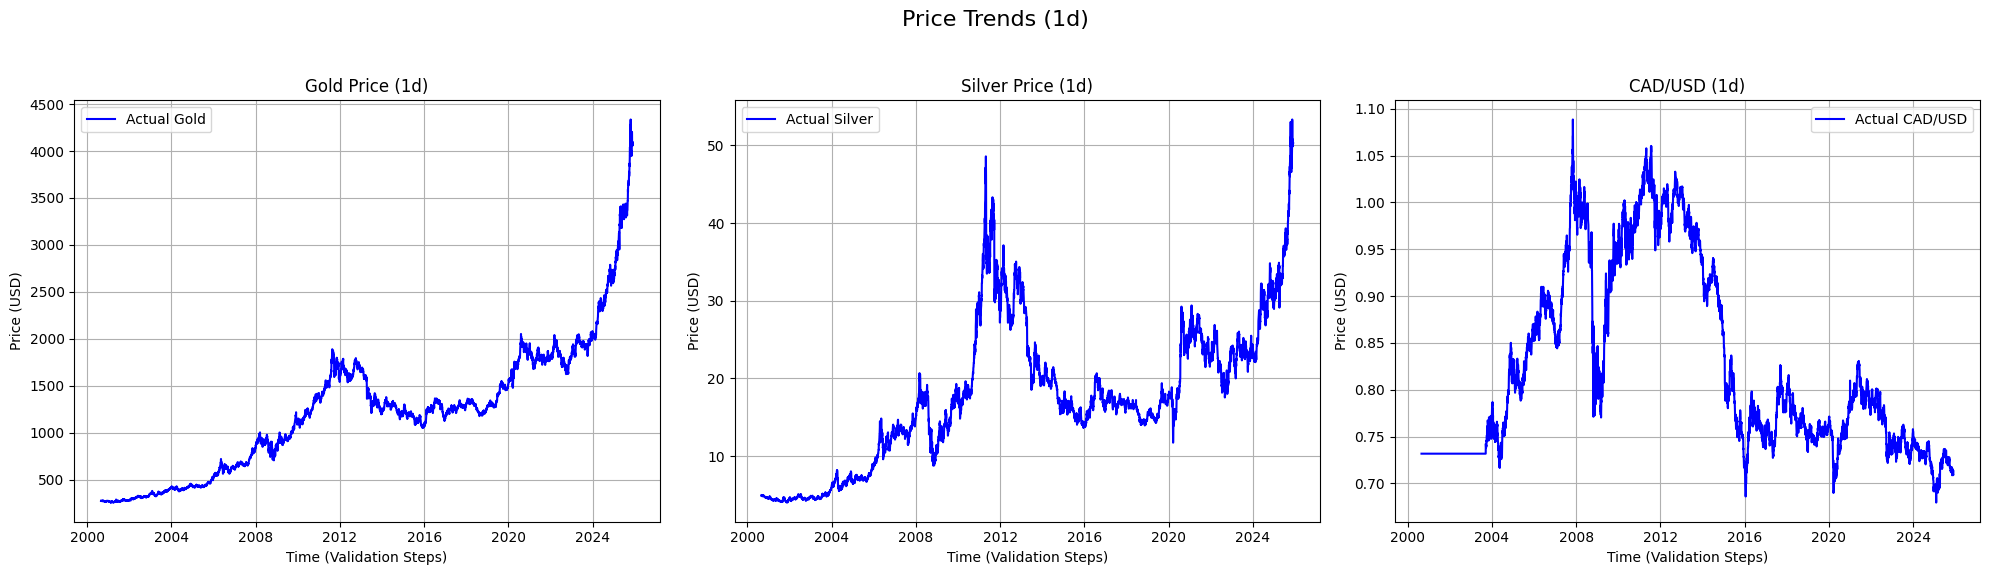

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1d)', fontsize=16)

# gold
axes[0].plot(prices_1d['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1d)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1d['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1d)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1d['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1d)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Removing Initial Noise

Some instances had initial plateaued values that are considered noise and may confuse the model, these timesteps will not be taken in the datasets for training

for 30m:
start 2025-10-3

for 1h :
start=2023-12-3

for 1d:
start=2003-09-18

In [54]:
gold_30m = yf.download("GC=F", start='2025-10-4', end='2025-12-2', interval="30m")
gold_30m.columns = gold_30m.columns.droplevel(1)
# gold_30m = fill_missing_values(gold_30m)
gold_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/gold.csv', index=True)

silver_30m = yf.download("SI=F", start='2025-10-4', end='2025-12-2', interval="30m")
silver_30m.columns = silver_30m.columns.droplevel(1)
# silver_30m = fill_missing_values(silver_30m)
silver_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/silver.csv', index=True)

cad_30m = yf.download("CADUSD=X", start='2025-10-4', end='2025-12-2', interval="30m")
cad_30m.columns = cad_30m.columns.droplevel(1)
# cad_30m = fill_missing_values(cad_30m)
cad_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/cad.csv', index=True)


gold_1h = yf.download("GC=F", start='2023-12-4', end='2025-12-2', interval="1h")
gold_1h.columns = gold_1h.columns.droplevel(1)
# gold_1h = fill_missing_values(gold_1h)
gold_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/gold.csv', index=True)

silver_1h = yf.download("SI=F", start='2023-12-4', end='2025-12-2', interval="1h")
silver_1h.columns = silver_1h.columns.droplevel(1)
# silver_1h = fill_missing_values(silver_1h)
silver_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/silver.csv', index=True)

cad_1h = yf.download("CADUSD=X", start='2023-12-4', end='2025-12-2', interval="1h")
cad_1h.columns = cad_1h.columns.droplevel(1)
# cad_1h = fill_missing_values(cad_1h)
cad_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/cad.csv', index=True)


gold_1d = yf.download("GC=F", start='2003-09-18', end='2025-12-2', interval="1d")
gold_1d.columns = gold_1d.columns.droplevel(1)
# gold_1d = fill_missing_values(gold_1d)
gold_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/gold.csv', index=True)

silver_1d = yf.download("SI=F", start='2003-09-18', end='2025-12-2', interval="1d")
silver_1d.columns = silver_1d.columns.droplevel(1)
# silver_1d = fill_missing_values(silver_1d)
silver_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/silver.csv', index=True)

cad_1d = yf.download("CADUSD=X", start='2003-09-18', end='2025-12-2', interval="1d")
cad_1d.columns = cad_1d.columns.droplevel(1)
# cad_1d = fill_missing_values(cad_1d)
cad_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/cad.csv', index=True)

/tmp/ipython-input-3904236589.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_30m = yf.download("GC=F", start='2025-10-4', end='2025-12-2', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3904236589.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_30m = yf.download("SI=F", start='2025-10-4', end='2025-12-2', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3904236589.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad_30m = yf.download("CADUSD=X", start='2025-10-4', end='2025-12-2', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3904236589.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_1h = yf.download("GC=F", start='2023-12-4', end='2025-12-2', interva

In [55]:
gold_30m = gold_30m[["Close"]].rename(columns={"Close": "Gold"})
silver_30m = silver_30m[["Close"]].rename(columns={"Close": "Silver"})
cad_30m = cad_30m[["Close"]].rename(columns={"Close": "CAD"})

prices_30m = gold_30m.join([silver_30m, cad_30m], how="outer")
prices_30m = prices_30m.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_30m.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_30m.csv")

In [56]:
gold_1h = gold_1h[["Close"]].rename(columns={"Close": "Gold"})
silver_1h = silver_1h[["Close"]].rename(columns={"Close": "Silver"})
cad_1h = cad_1h[["Close"]].rename(columns={"Close": "CAD"})

prices_1h = gold_1h.join([silver_1h, cad_1h], how="outer")
prices_1h = prices_1h.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1h.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1h.csv")

In [57]:
gold_1d = gold_1d[["Close"]].rename(columns={"Close": "Gold"})
silver_1d = silver_1d[["Close"]].rename(columns={"Close": "Silver"})
cad_1d = cad_1d[["Close"]].rename(columns={"Close": "CAD"})

prices_1d = gold_1d.join([silver_1d, cad_1d], how="outer")
prices_1d = prices_1d.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1d.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1d.csv")

In [42]:
prices_30m.head()

Price,Gold,Silver,CAD
Datetime,,,
2025-10-05 23:00:00+00:00,3958.5,48.395,0.716220
2025-10-05 23:30:00+00:00,3958.5,48.395,0.716117
2025-10-06 00:00:00+00:00,3958.5,48.395,0.716184
2025-10-06 00:30:00+00:00,3958.5,48.395,0.716522
2025-10-06 01:00:00+00:00,3958.5,48.395,0.716384


In [43]:
prices_30m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1973 entries, 2025-10-05 23:00:00+00:00 to 2025-12-02 04:30:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    1973 non-null   float64
 1   Silver  1973 non-null   float64
 2   CAD     1973 non-null   float64
dtypes: float64(3)
memory usage: 61.7 KB


In [44]:
prices_30m.describe()

Price,Gold,Silver,CAD
count,1973.000000,1973.000000,1973.000000
mean,4102.678971,50.063748,0.713069
std,102.338747,2.476129,0.002467
min,3912.000000,45.665001,0.707269
25%,4015.300049,48.180000,0.711739
50%,4084.000000,49.654999,0.713079
75%,4177.700195,51.310001,0.714643
max,4394.299805,59.195000,0.719746


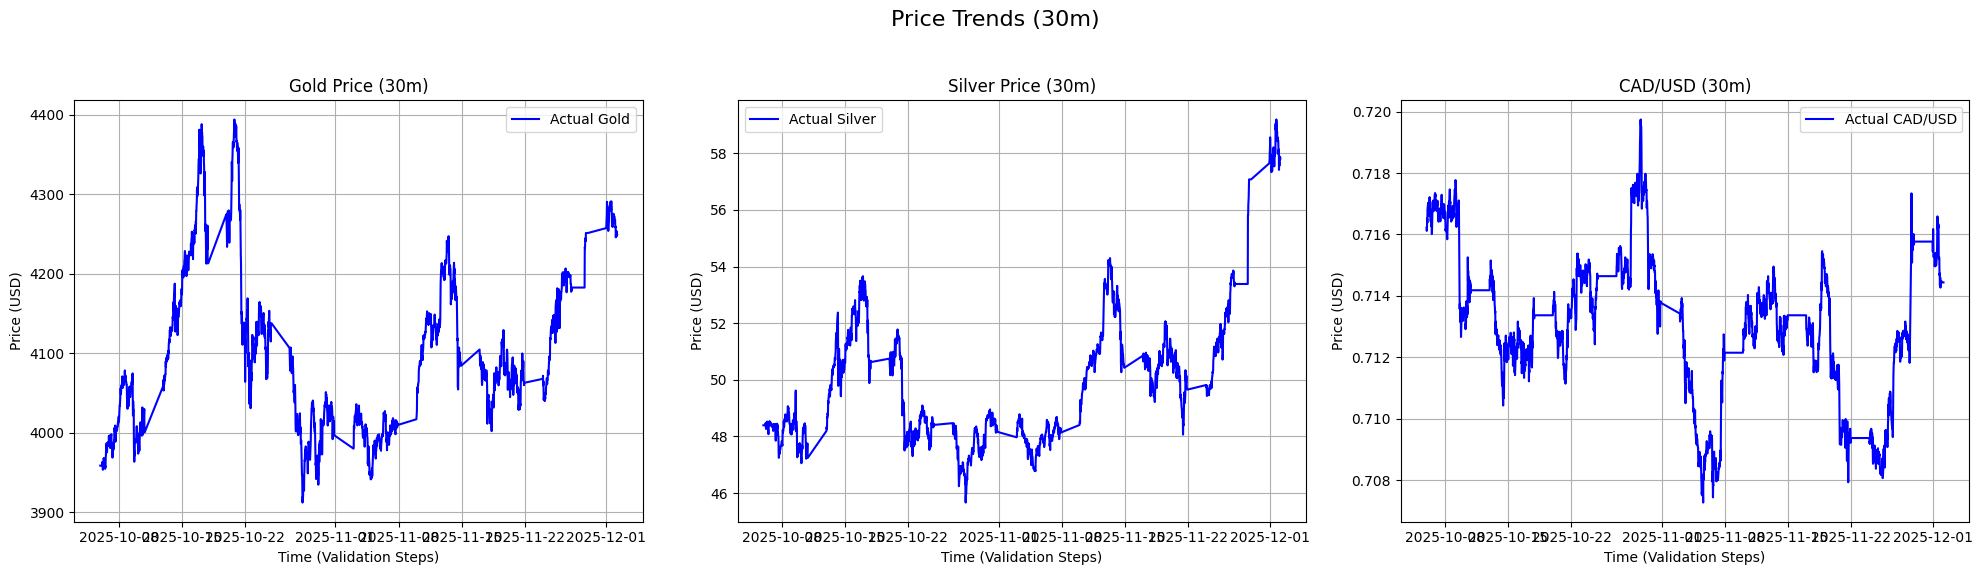

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (30m)', fontsize=16)

# gold
axes[0].plot(prices_30m['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (30m)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_30m['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (30m)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_30m['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (30m)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

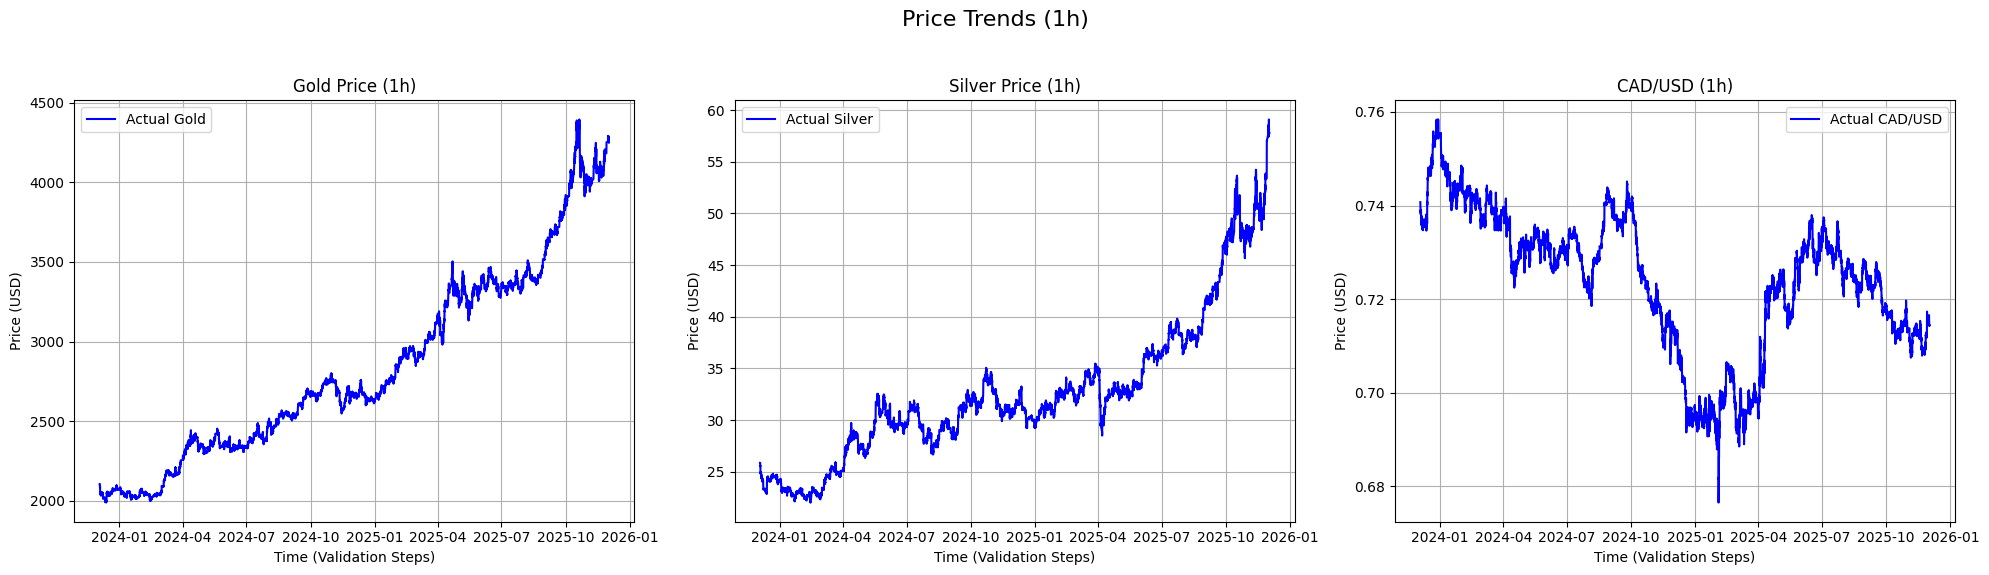

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1h)', fontsize=16)

# gold
axes[0].plot(prices_1h['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1h)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1h['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1h)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1h['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1h)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

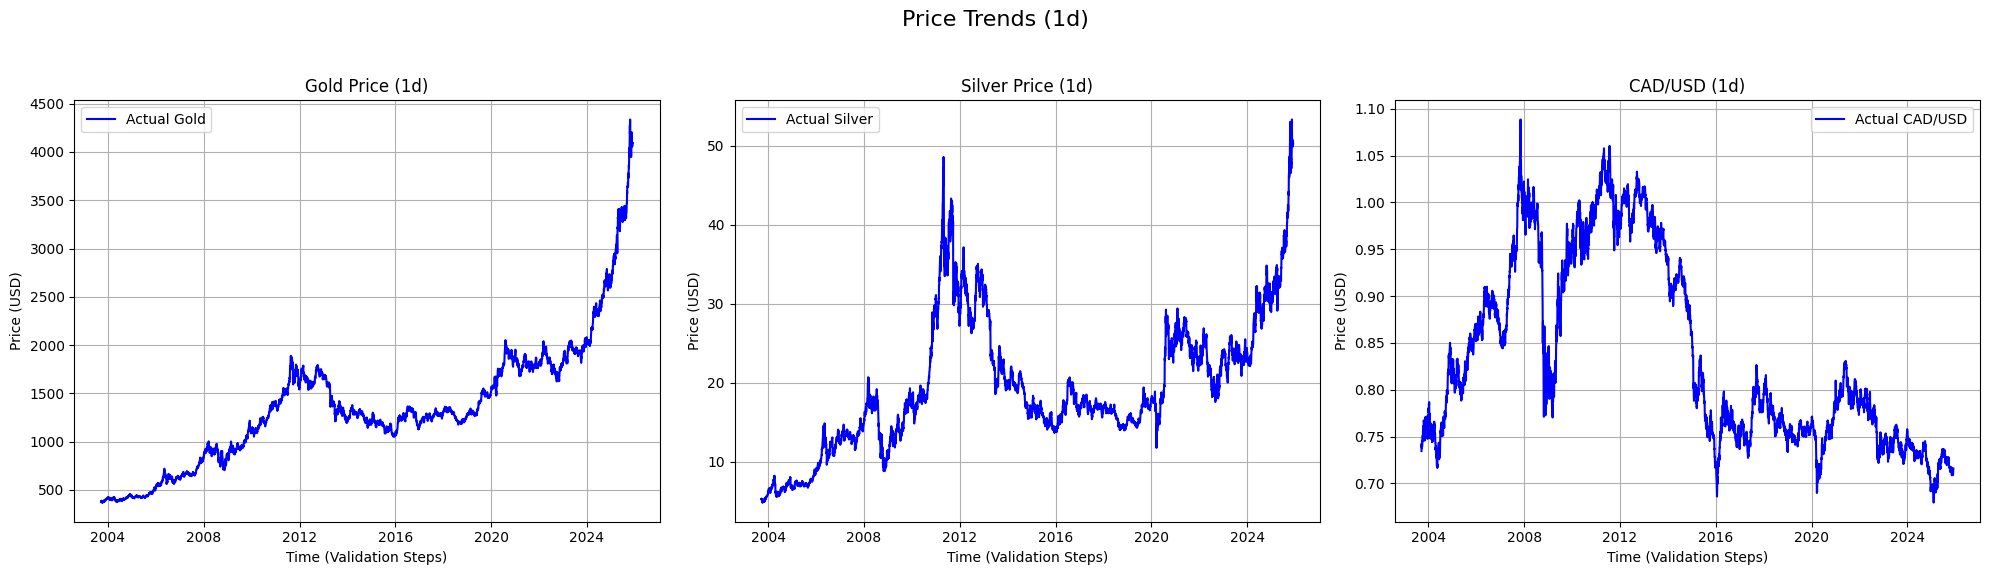

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1d)', fontsize=16)

# gold
axes[0].plot(prices_1d['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1d)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1d['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1d)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1d['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1d)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [52]:
import hashlib

def hash_timestamp(timestamp):
    return hashlib.sha256(str(timestamp).encode()).hexdigest()

prices_30m['Hashed_Timestamp'] = prices_30m.index.map(hash_timestamp)
prices_1h['Hashed_Timestamp'] = prices_1h.index.map(hash_timestamp)
prices_1d['Hashed_Timestamp'] = prices_1d.index.map(hash_timestamp)

print("Prices 30m with hashed timestamps:")
display(prices_30m.head())
print("\nPrices 1h with hashed timestamps:")
display(prices_1h.head())
print("\nPrices 1d with hashed timestamps:")
display(prices_1d.head())

Prices 30m with hashed timestamps:


Price,Gold,Silver,CAD,Hashed_Timestamp
Datetime,,,,
2025-10-05 23:00:00+00:00,3958.5,48.395,0.716220,12da4c799a17cab47d1e832dd11753b1bbc63dce9dbfe8...
2025-10-05 23:30:00+00:00,3958.5,48.395,0.716117,3df58010c56c5c911ff292a0511f1b6178f554f47e2dd5...
2025-10-06 00:00:00+00:00,3958.5,48.395,0.716184,cd3506492f2acb4e74ca30196fb276f482972960721197...
2025-10-06 00:30:00+00:00,3958.5,48.395,0.716522,f1ba13f08ec7718976be7a7680965bee3bc9db6319696a...
2025-10-06 01:00:00+00:00,3958.5,48.395,0.716384,b589b2dc681700e6bcc6b509f5d98e4c5df837438729c4...



Prices 1h with hashed timestamps:


Price,Gold,Silver,CAD,Hashed_Timestamp
Datetime,,,,
2023-12-04 00:00:00+00:00,2105.699951,25.865,0.740730,fada0bca82fc1b502dfcf1751b0301971cf8c920b78f46...
2023-12-04 01:00:00+00:00,2105.699951,25.865,0.740466,845e0bf5917210b41b06c83665afce2ee38f1097d17a8b...
2023-12-04 02:00:00+00:00,2105.699951,25.865,0.740297,b1e24f9b5d60ba307dda442db29b6fed6e610e5bf06bb0...
2023-12-04 03:00:00+00:00,2105.699951,25.865,0.739809,3aa96d14f5194e84265146bfe2029bcf61cccc1806e272...
2023-12-04 04:00:00+00:00,2105.699951,25.865,0.739973,0230e02057356734eede43a2af3f352f70ec546cdddf1b...



Prices 1d with hashed timestamps:


Price,Gold,Silver,CAD,Hashed_Timestamp
Date,,,,
2003-09-18,376.600006,5.255,0.734484,0c708f590cbc2fb295d7714ea943c726d07e2157836a98...
2003-09-19,381.799988,5.282,0.742280,10a2318797cdc2d73a23f3638210ba6801042d9492986f...
2003-09-22,387.200012,5.265,0.738443,f7f82a9e751f0ea70f671f06713b74bab24cb7913b3fae...
2003-09-23,385.899994,5.235,0.737953,50766fd61a457dfac6463db87d17db7f305f50889667a1...
2003-09-24,387.500000,5.302,0.740686,75c4c83428d7d732e92c35c725f436a0bbc98aa56272e3...


In [53]:
prices_30m.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/hashedprices_30m.csv")
prices_1h.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/hashedprices_1h.csv")
prices_1d.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/hashedprices_1d.csv")